Regular expressions are useful in a wide variety of text processing tasks, and more generally string processing, where the data need not be textual. Common applications include data validation, data scraping (especially web scraping), data wrangling, simple parsing, the production of syntax highlighting systems, and many other tasks.

In [ ]:
'''
X-RP-State: 1095x{ar}y394<rne>3a34<med>41a<aai>x{bb}y
MIME-Version: 1.0
Date: Sun, 18 Sep 1949
From: wile.e.coyote@desert.example.com
To: support@acme.example.com
Subject: suit failure

Content-Type: text/plain; charset="ASCII"

Dear sirs,

I'm writing to inform you of a drastic failure of your ACME Super Outfit. On Saturday, September 17, I endeavored to use your suit to achieve the dream of flight. I was beyond hopeful that my purchase from Acme Corporation would finally enable to capture my nemesis, the Road Runner.

I am confident that I used your Super Outfit according to the directions, as it is well known, I am a super-genius. After failing to achieve my goals using a variety of mechanisms, including boomerang, a fake "School Crossing" sign, a rocket launcher, and a mural of a tunnel, I turned to your corporation's device. I was most disappointed at its failure, in fact, I uttered the oath "$#^!*" then screamed "Aaaaaaaaaah!" all the way to the ground.

Product information was as follows:

ACME Super Outfit
Model: 3990[X]\5
S/N: 9230413-3
Date of purchase: Friday September 15, 1949

Enclosed, please find an invoice for my hospital bills. The large fall was quite incapacitating.
'''

### 1. Character matches

[]
Characters contained in square brackets ([]) represent a character class—an enumerated set of characters to match from. A character class metacharacter sequence will match any single character contained in the class.

https://pythex.org/

Square brackets ([]) indicates that we are looking at a range of information. Example t[aeiou]
we are looking for a pattern that starts with the letter t and then one of the vowels. Let’s look at some of the matches are::
the 'tu' in 'Saturday', the 'ti' in 'Corporation', the 'te' in 'uttered'.

1. thing
2. t[aeiou]
3. [0-9][0-9][0-9][0-9]
4. [a-z]:
5. [A-Z][A-Za-z]
6. [A-Za-z]
7. [^A-Za-z]
8. [0-9][^13579]
9. [-a-z][A-Z]
10. [#:^]
11. [[][A-Z][]]
12. \[X\]

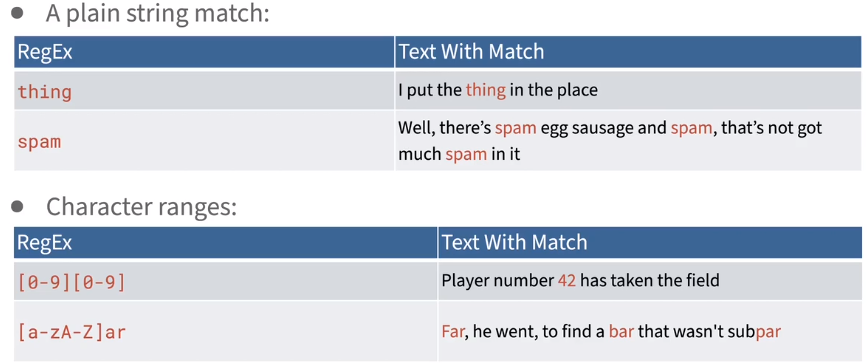

### 2. Meta-characters

\ Signals a special sequence (can also be used to escape special characters)
. Any character (except newline character)
^ Starts with
$ Ends with
* Zero or more occurrences
+ One or more occurrences
{} Exactly the specified number of occurrences
| Either or
() Capture and group

**Special Sequences**
\A Returns a match if the specified characters are at the beginning of the string

\b Returns a match where the specified characters are at the beginning or at the end of a word r"ain\b"
\B Returns a match where the specified characters are present, but NOT at the beginning (or at the end) of a word

\d Returns a match where the string contains digits (numbers from 0-9)
\D Returns a match where the string DOES NOT contain digits

\s Returns a match where the string contains a white space character (space, tab, newline)
\S Returns a match where the string DOES NOT contain a white space character

\w Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
\W Returns a match where the string DOES NOT contain any word characters

\Z Returns a match if the specified characters are at the end of the string

1. [aeiou]\.[aeiou] or [a-z]\.[a-z]
use literal match .
2. ".
3. F[a-zA-Z0-9_] or F[\w]
4. E[\W]
5. [0-9][0-9][0-9][0-9]  or \d\d\d\d
6. \d\D\d
7. \s\w\w\w\w\s
8. using metacharacters inside of character class
\d[-\s]
9. \\\d


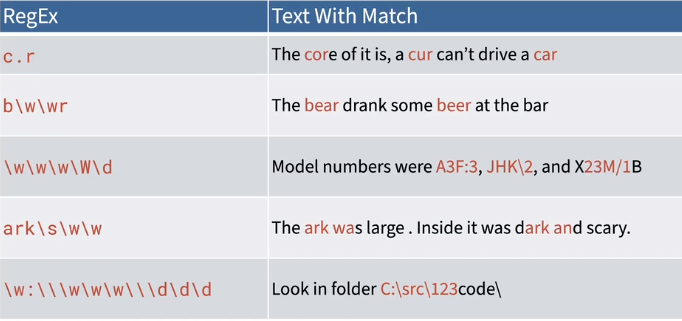

In [ ]:
1. Anchoring to the beginning of the string (look for X in the beginning of the string)
^X or \AX
2. use Multiline mode (beginning of the paragraph)
^P 
3. \.$
4. \bf
5. er\b
6. \Ber\B

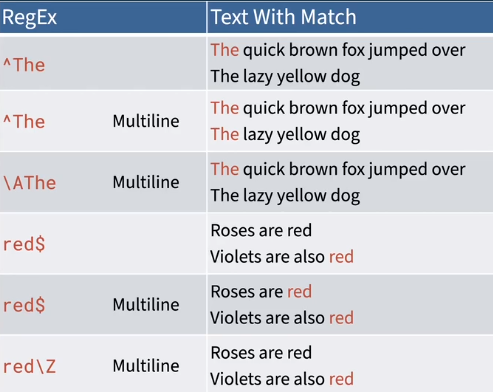

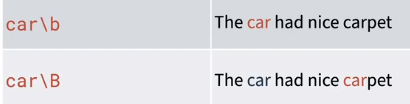

In [26]:
# \b in a Python string is shorthand for a backspace character.
print("fooy\bbar")

fooybar


In [41]:
# \b-- word boundries
'''
There are three different positions that qualify as word boundaries:

Before the first character in the string, if the first character is a word character.
After the last character in the string, if the last character is a word character.
Between two characters in the string, where one is a word character and the other is not a word character.
'''
import re
s= 'the car had nice_123skjdv petaskjdfh'
# pattern= re.compile( r'\bcar\b')
pattern= re.compile( r'\b(\w{3})\b.*')
pattern.findall(s)

['the']

### 3. Repeating expressions with quantifiers

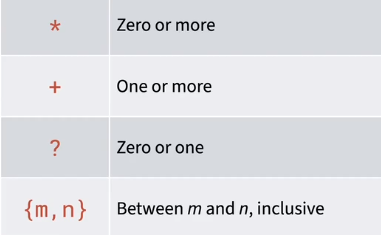

In [ ]:
1. 39+0
2. 39*0
3. 39?0
4. Match this S/N: 9230413-3 in the string 
5. find words starts with vowel and end with any no of characters
6. find any no of chars inside <>
7. find any no of chars inside <> Non greedy mode
8. Aa+
9. Aa+?
10. Aa?
11. Aa?? (least greedy between 0 or 1) is 0
12. \d{7}
13. \s\d{2,7}
14. \s\d{4, }
15. \s\d{,7}
16. x{ar}y
17. a{6,9}
18. a{6,9}?

In [ ]:
4. S/N: \d+-\w
5. \b[aeiou][a-z]*\b
6. <.*>
7. <.*?>

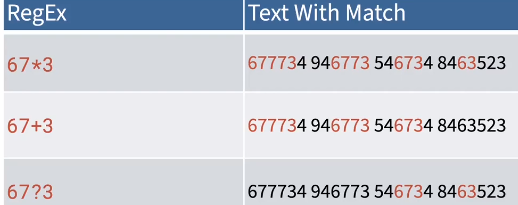

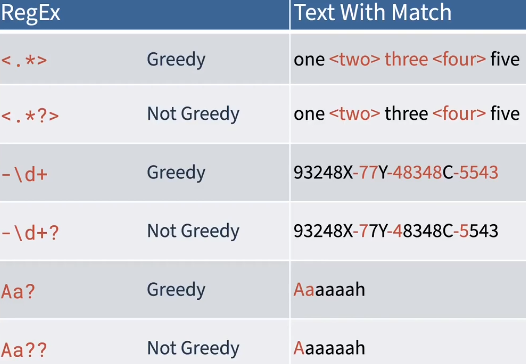

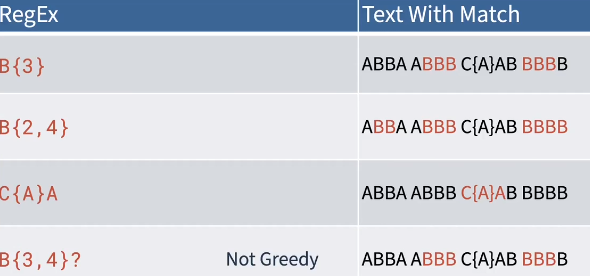

In [8]:
import re
s= 'one<two>three<four>five'
pattern= re.compile( '<.*?>')
pattern.findall(s)

['<two>', '<four>']

In [10]:
import re
s= 'ABBAABBBC{A}ABBBBBB'
pattern= re.compile( 'B{2,4}?')
pattern.findall(s)

['BB', 'BB', 'BB', 'BB', 'BB']

### 4. Grouping 

1. Parts of pattern can be grouped together
2. access portion of a match
3. Repeat sequences
4. back references

In [ ]:
1. (1\d)
2. b([aeiou]+)
3. b([aeiou])+
4. (\w)\1 -- backreference
5. \b(\w{3})\b.*\1
# three letter word separated by word boundaries